In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [226]:
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw

In [227]:
df = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/px4_odom.csv')
# df = df[df['timestamp_us'] < 1e12]
# display(df)
df[['roll', 'pitch', 'yaw']] = df.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
df

,timestamp_us,px,py,pz,qw,qx,qy,qz,yaw_imu,yaw_slam,roll,pitch,yaw
0,1759661548176421,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0,0,0.000000,0.000000,0.000000e+00
1,1759661548184365,0.00000,0.00000,0.000000,1.000000,-0.000674,0.000285,1.074900e-07,0,0,-0.001347,0.000570,-1.688862e-07
2,1759661548192516,0.00000,0.00000,0.000000,1.000000,-0.000542,-0.000569,1.166730e-06,0,0,-0.001084,-0.001138,2.950423e-06
3,1759661548200277,0.00000,0.00000,0.000000,0.999999,-0.000171,-0.001277,1.856300e-06,0,0,-0.000342,-0.002555,4.149428e-06
4,1759661548208460,0.00000,0.00000,0.000000,0.999999,0.000566,-0.001584,1.608260e-06,0,0,0.001132,-0.003169,1.422269e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1759661661633571,1.84904,-1.67717,-0.046867,-0.585247,-0.759257,-0.266610,-9.967130e-02,0,0,1.874431,0.161413,5.566960e-01
2176,1759661661641519,1.84918,-1.67795,-0.046905,-0.605272,-0.738873,-0.269127,-1.236280e-01,0,0,1.812324,0.143592,5.860209e-01
2177,1759661662647292,1.99161,-1.55369,0.013738,-0.619282,-0.724153,-0.268708,-1.410290e-01,0,0,1.766870,0.128916,6.047577e-01
2178,1759661662655123,1.99193,-1.55411,0.013800,-0.630920,-0.712931,-0.268865,-1.462190e-01,0,0,1.734034,0.131152,6.099039e-01


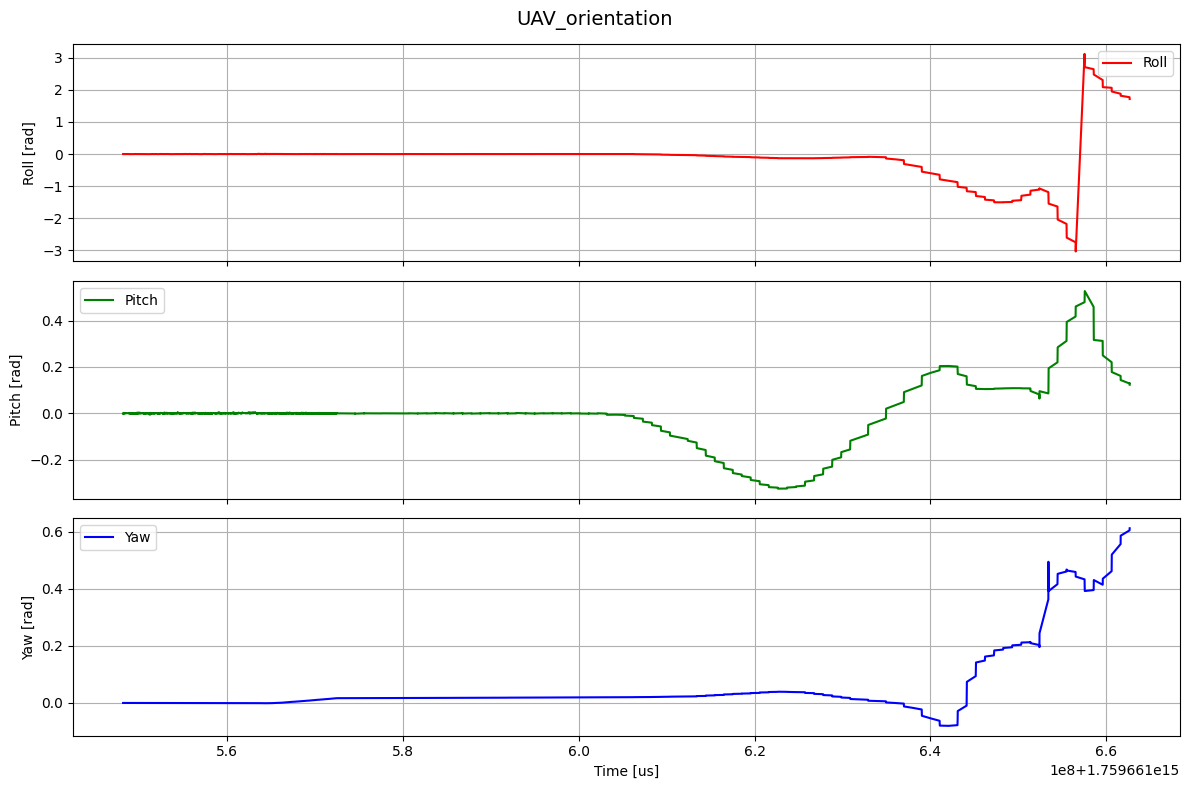

In [228]:
fig, (ax_roll, ax_pitch, ax_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_roll.plot(df['timestamp_us'], df['roll'], label='Roll', color='r')
ax_roll.set_ylabel("Roll [rad]")
ax_roll.grid(True)
ax_roll.legend()

# Pitch
ax_pitch.plot(df['timestamp_us'], df['pitch'], label='Pitch', color='g')
ax_pitch.set_ylabel("Pitch [rad]")
ax_pitch.grid(True)
ax_pitch.legend()

# Yaw
ax_yaw.plot(df['timestamp_us'], df['yaw'], label='Yaw', color='b')
ax_yaw.set_xlabel("Time [us]")
ax_yaw.set_ylabel("Yaw [rad]")
ax_yaw.grid(True)
ax_yaw.legend()

# タイトルを全体に
fig.suptitle("UAV_orientation", fontsize=14)

plt.tight_layout()
plt.show()

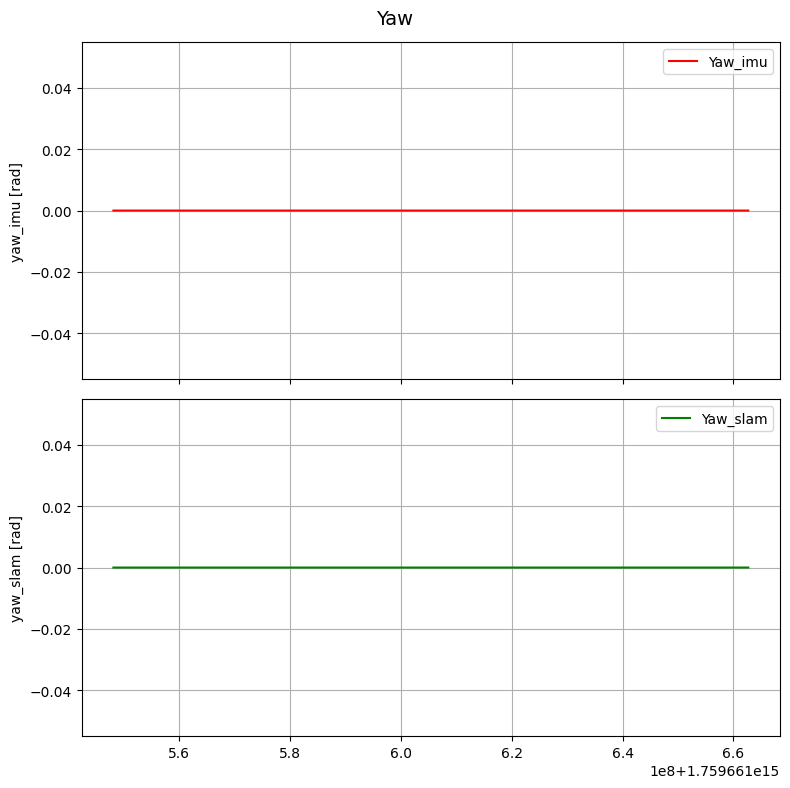

In [229]:
fig, (ax_imuy, imus) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax_imuy.plot(df['timestamp_us'], df['yaw_imu'], label='Yaw_imu', color='r')
ax_imuy.set_ylabel("yaw_imu [rad]")
ax_imuy.grid(True)
ax_imuy.legend()

imus.plot(df['timestamp_us'], df['yaw_slam'], label='Yaw_slam', color='g')
imus.set_ylabel("yaw_slam [rad]")
imus.grid(True)
imus.legend()

# タイトルを全体に
fig.suptitle("Yaw", fontsize=14)

plt.tight_layout()
plt.show()

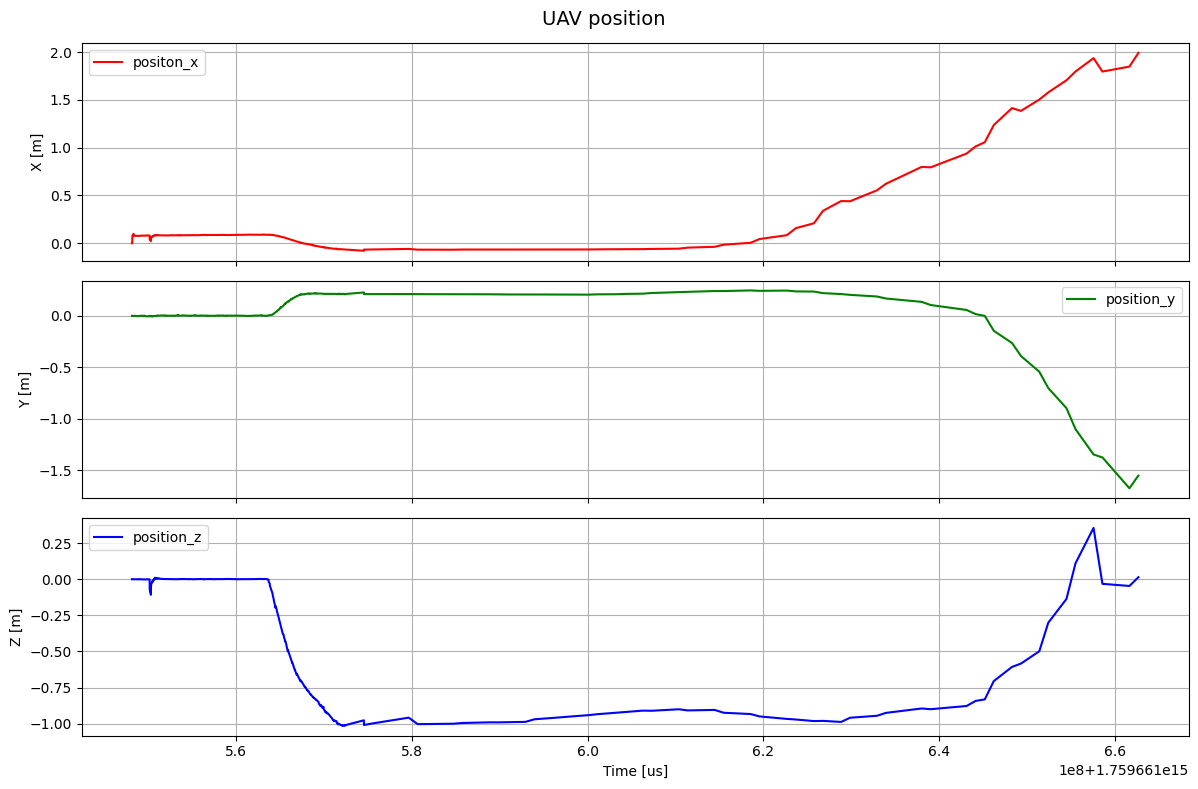

In [230]:
fig, (ax_px, ax_py, ax_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_px.plot(df['timestamp_us'], df['px'], label='positon_x', color='r')
ax_px.set_ylabel("X [m]")
ax_px.grid(True)
ax_px.legend()

# Pitch
ax_py.plot(df['timestamp_us'], df['py'], label='position_y', color='g')
ax_py.set_ylabel("Y [m]")
ax_py.grid(True)
ax_py.legend()
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw
# Yaw
ax_pz.plot(df['timestamp_us'], df['pz'], label='position_z', color='b')
ax_pz.set_xlabel("Time [us]")
ax_pz.set_ylabel("Z [m]")
ax_pz.grid(True)
ax_pz.legend()

# タイトルを全体に
fig.suptitle("UAV position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,1759137186174,0.062066,-0.033950,0.126088,0.718620,-0.006967,-0.008852,0.695312,-0.022326,-0.003034,1.537865
1,1759137186182,0.062087,-0.033968,0.126418,0.718626,-0.006963,-0.008842,0.695306,-0.022306,-0.003026,1.537847
2,1759137186190,0.062108,-0.033987,0.126772,0.718636,-0.006952,-0.008836,0.695296,-0.022281,-0.003032,1.537819
3,1759137186198,0.062131,-0.034008,0.127148,0.718634,-0.006948,-0.008840,0.695298,-0.022281,-0.003043,1.537825
4,1759137186206,0.062156,-0.034032,0.127549,0.718632,-0.006955,-0.008846,0.695300,-0.022299,-0.003043,1.537831
...,...,...,...,...,...,...,...,...,...,...,...
76017,1759138925093,127.030000,-315.616000,-17.635000,0.999919,-0.012698,-0.000417,-0.000513,-0.025396,-0.000847,-0.001016
76018,1759138925109,127.054000,-315.683000,-17.645200,0.999919,-0.012702,-0.000412,-0.000514,-0.025404,-0.000837,-0.001018
76019,1759138925117,127.067000,-315.717000,-17.650200,0.999919,-0.012698,-0.000415,-0.000515,-0.025397,-0.000843,-0.001020
76020,1759138925125,127.079000,-315.751000,-17.655300,0.999919,-0.012712,-0.000409,-0.000520,-0.025425,-0.000832,-0.001030


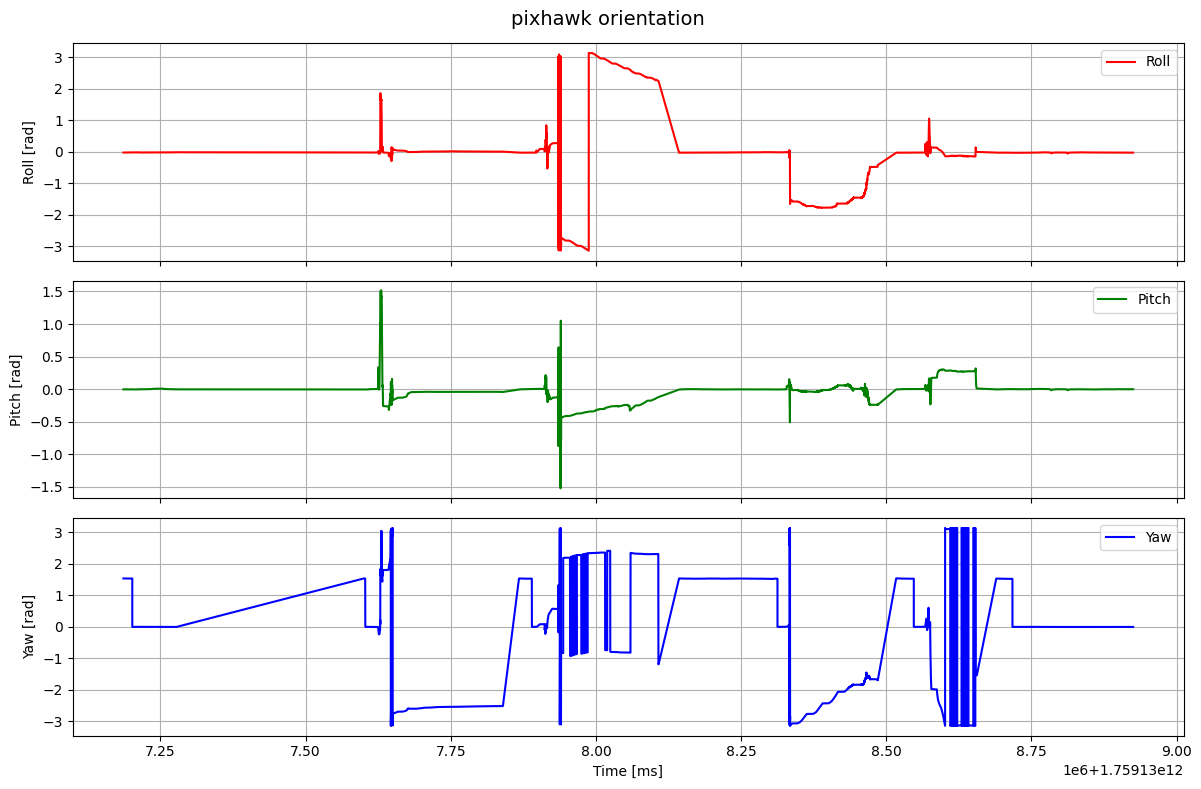

In [231]:
df2 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/pixhawk_odom.csv')
df2 = df2[df2['timestamp_us'] > 1e12]
df2[['roll', 'pitch', 'yaw']] = df2.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df2)
fig, (px_roll, px_pitch, px_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
px_roll.plot(df2['timestamp_us'], df2['roll'], label='Roll', color='r')
px_roll.set_ylabel("Roll [rad]")
px_roll.grid(True)
px_roll.legend()

# Pitch
px_pitch.plot(df2['timestamp_us'], df2['pitch'], label='Pitch', color='g')
px_pitch.set_ylabel("Pitch [rad]")
px_pitch.grid(True)
px_pitch.legend()

# Yaw
px_yaw.plot(df2['timestamp_us'], df2['yaw'], label='Yaw', color='b')
px_yaw.set_xlabel("Time [ms]")
px_yaw.set_ylabel("Yaw [rad]")
px_yaw.grid(True)
px_yaw.legend()

# タイトルを全体に
fig.suptitle("pixhawk orientation", fontsize=14)

plt.tight_layout()
plt.show()

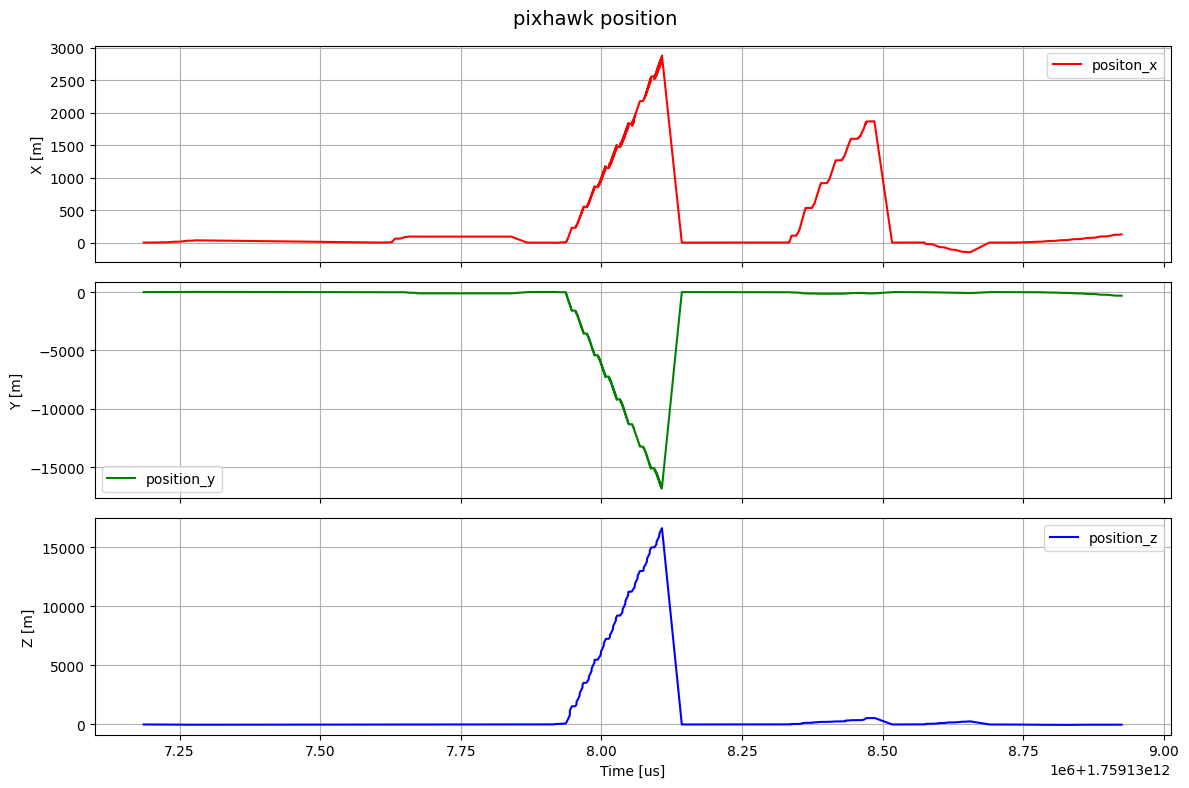

In [232]:
fig, (pix_px, pix_py, pix_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
pix_px.plot(df2['timestamp_us'], df2['px'], label='positon_x', color='r')
pix_px.set_ylabel("X [m]")
pix_px.grid(True)
pix_px.legend()

# Pitch
pix_py.plot(df2['timestamp_us'], df2['py'], label='position_y', color='g')
pix_py.set_ylabel("Y [m]")
pix_py.grid(True)
pix_py.legend()

# Yaw
pix_pz.plot(df2['timestamp_us'], df2['pz'], label='position_z', color='b')
pix_pz.set_xlabel("Time [us]")
pix_pz.set_ylabel("Z [m]")
pix_pz.grid(True)
pix_pz.legend()

# タイトルを全体に
fig.suptitle("pixhawk position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,1759661548212002,0.078333,0.002414,0.000816,0.999996,-0.000943,-0.001163,-0.002241,-0.001881,-0.002330,-0.004481
1,1759661548361393,0.078530,0.000986,0.000429,0.999996,-0.000980,-0.000784,-0.002369,-0.001956,-0.001572,-0.004737
2,1759661548507012,0.077971,0.001361,0.000619,0.999997,-0.000879,-0.000660,-0.002247,-0.001755,-0.001325,-0.004494
3,1759661548708569,0.077980,0.002865,0.000844,0.999997,-0.000734,-0.000832,-0.002300,-0.001465,-0.001667,-0.004600
4,1759661548854006,0.077262,0.002966,0.000243,0.999997,-0.000533,-0.000702,-0.002346,-0.001062,-0.001407,-0.004692
...,...,...,...,...,...,...,...,...,...,...,...
171,1759661648482832,1.327640,0.316751,0.625377,0.656289,-0.747206,0.075355,-0.072729,-1.699145,-0.009777,-0.209616
172,1759661651554503,1.516190,0.606682,0.381871,0.705873,-0.701694,0.070310,-0.066526,-1.565432,0.005898,-0.193804
173,1759661654654412,1.727260,0.978996,0.012591,0.708515,-0.669171,0.147143,-0.169013,-1.509630,-0.017692,-0.451696
174,1759661657719113,1.779520,1.278560,0.027297,0.035750,-0.967057,0.177465,-0.178968,-3.000405,-0.339967,-0.387255


,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw


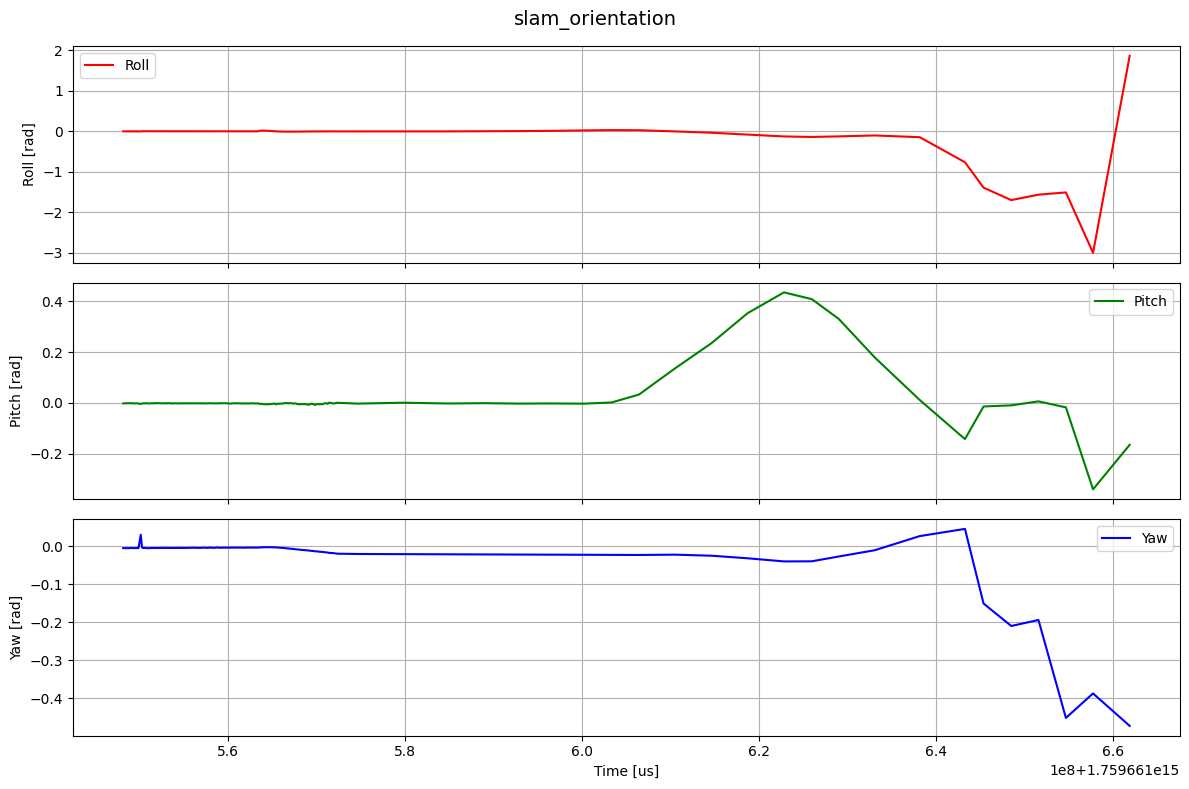

In [233]:
df3 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/slam_odom.csv')
# df3 = df3[df3['timestamp_us'] > 1e12]
df3[['roll', 'pitch', 'yaw']] = df3.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df3)
display(df3[df3['yaw'] > 1.5])
fig, (sx_roll, sx_pitch, sx_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
sx_roll.plot(df3['timestamp_us'], df3['roll'], label='Roll', color='r')
sx_roll.set_ylabel("Roll [rad]")
sx_roll.grid(True)
sx_roll.legend()

# Pitch
sx_pitch.plot(df3['timestamp_us'], df3['pitch'], label='Pitch', color='g')
sx_pitch.set_ylabel("Pitch [rad]")
sx_pitch.grid(True)
sx_pitch.legend()

# Yaw
sx_yaw.plot(df3['timestamp_us'], df3['yaw'], label='Yaw', color='b')
sx_yaw.set_xlabel("Time [us]")
sx_yaw.set_ylabel("Yaw [rad]")
sx_yaw.grid(True)
sx_yaw.legend()

# タイトルを全体に
fig.suptitle("slam_orientation", fontsize=14)

plt.tight_layout()
plt.show()

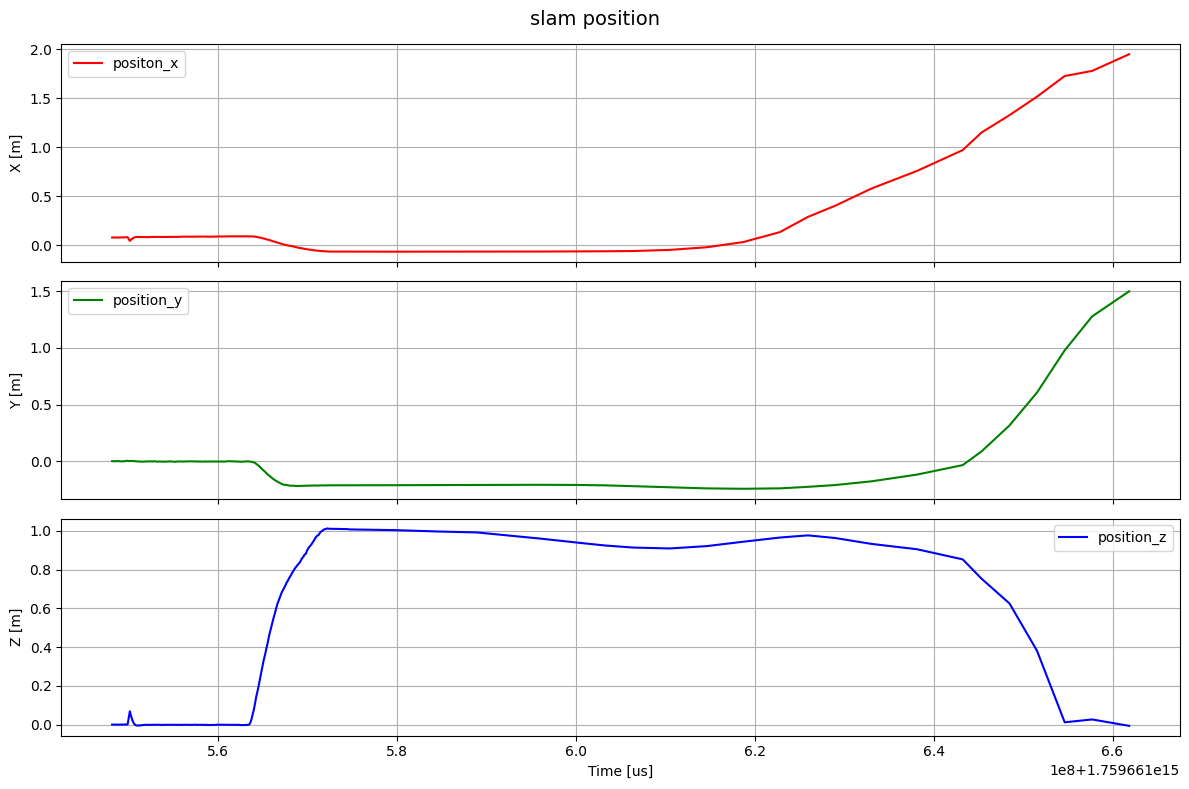

In [234]:
fig, (sx_px, sx_py, sx_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
sx_px.plot(df3['timestamp_us'], df3['px'], label='positon_x', color='r')
sx_px.set_ylabel("X [m]")
sx_px.grid(True)
sx_px.legend()

# Pitch
sx_py.plot(df3['timestamp_us'], df3['py'], label='position_y', color='g')
sx_py.set_ylabel("Y [m]")
sx_py.grid(True)
sx_py.legend()

# Yaw
sx_pz.plot(df3['timestamp_us'], df3['pz'], label='position_z', color='b')
sx_pz.set_xlabel("Time [us]")
sx_pz.set_ylabel("Z [m]")
sx_pz.grid(True)
sx_pz.legend()

# タイトルを全体に
fig.suptitle("slam position", fontsize=14)

plt.tight_layout()
plt.show()

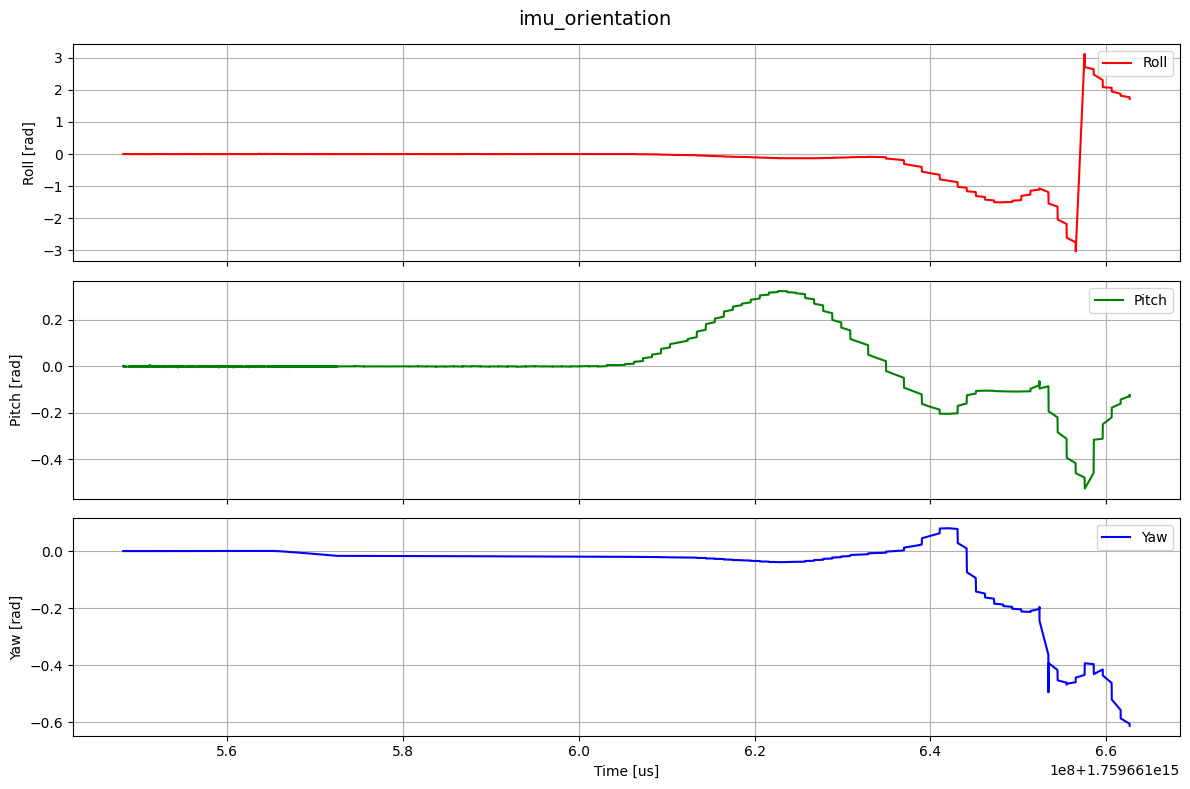

In [235]:
df4 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/madgwick_imu.csv')
df4[['roll', 'pitch', 'yaw']] = df4.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
fig, (ix_roll, ix_pitch, ix_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
ix_roll.plot(df4['timestamp_us'], df4['roll'], label='Roll', color='r')
ix_roll.set_ylabel("Roll [rad]")
ix_roll.grid(True)
ix_roll.legend()

# Pitch
ix_pitch.plot(df4['timestamp_us'], df4['pitch'], label='Pitch', color='g')
ix_pitch.set_ylabel("Pitch [rad]")
ix_pitch.grid(True)
ix_pitch.legend()

# Yaw
ix_yaw.plot(df4['timestamp_us'], df4['yaw'], label='Yaw', color='b')
ix_yaw.set_xlabel("Time [us]")
ix_yaw.set_ylabel("Yaw [rad]")
ix_yaw.grid(True)
ix_yaw.legend()

# タイトルを全体に
fig.suptitle("imu_orientation", fontsize=14)

plt.tight_layout()
plt.show()

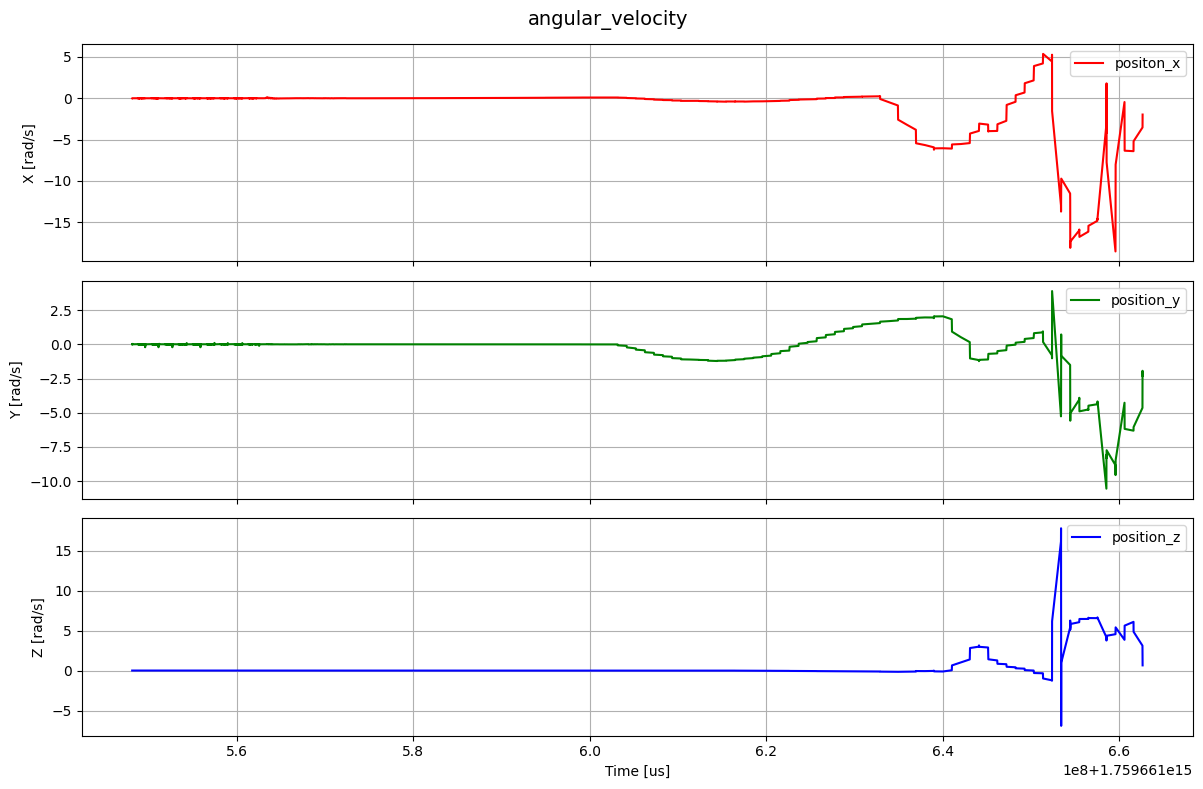

In [236]:
fig, (ix_px, ix_py, ix_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ix_px.plot(df4['timestamp_us'], df4['avx'], label='positon_x', color='r')
ix_px.set_ylabel("X [rad/s]")
ix_px.grid(True)
ix_px.legend()

# Pitch
ix_py.plot(df4['timestamp_us'], df4['avy'], label='position_y', color='g')
ix_py.set_ylabel("Y [rad/s]")
ix_py.grid(True)
ix_py.legend()

# Yaw
ix_pz.plot(df4['timestamp_us'], df4['avz'], label='position_z', color='b')
ix_pz.set_xlabel("Time [us]")
ix_pz.set_ylabel("Z [rad/s]")
ix_pz.grid(True)
ix_pz.legend()

# タイトルを全体に
fig.suptitle("angular_velocity", fontsize=14)

plt.tight_layout()
plt.show()

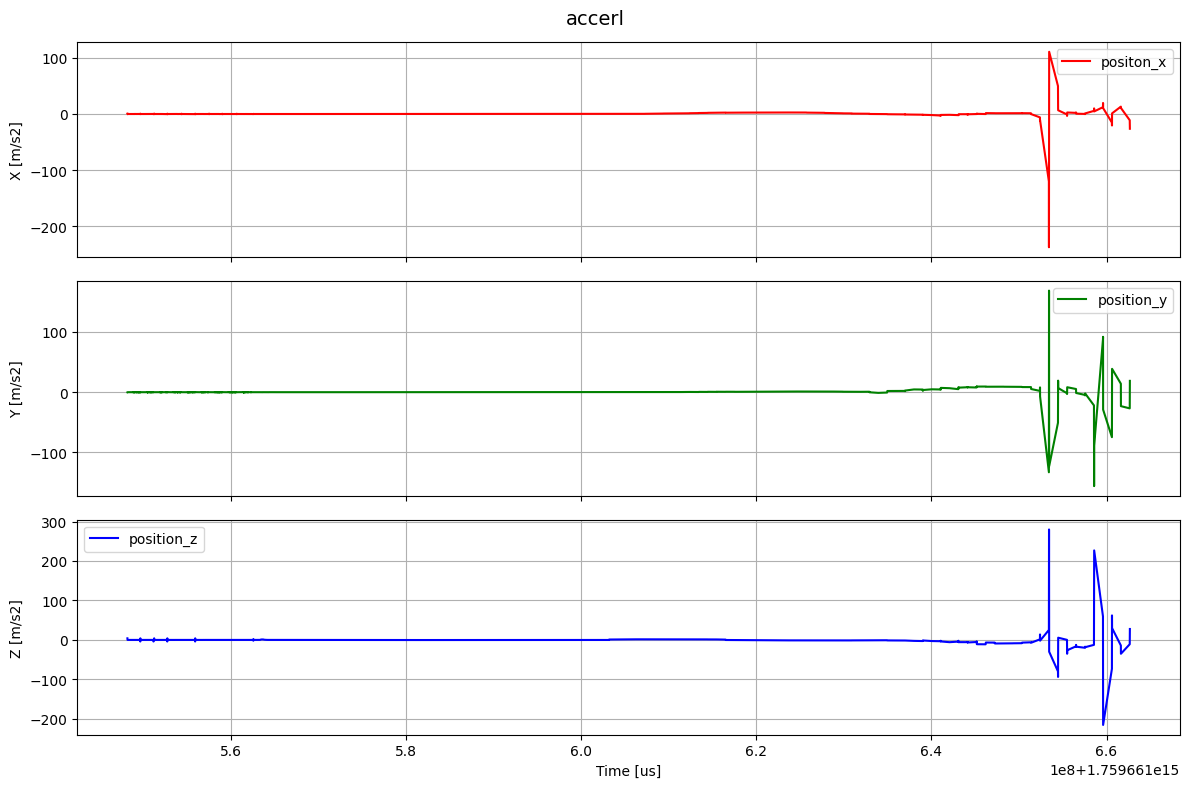

In [237]:
fig, (ax, ay, az) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax.plot(df4['timestamp_us'], df4['ax'], label='positon_x', color='r')
ax.set_ylabel("X [m/s2]")
ax.grid(True)
ax.legend()

# Pitch
ay.plot(df4['timestamp_us'], df4['ay'], label='position_y', color='g')
ay.set_ylabel("Y [m/s2]")
ay.grid(True)
ay.legend()

# Yaw
az.plot(df4['timestamp_us'], df4['az'], label='position_z', color='b')
az.set_xlabel("Time [us]")
az.set_ylabel("Z [m/s2]")
az.grid(True)
az.legend()

# タイトルを全体に
fig.suptitle("accerl", fontsize=14)

plt.tight_layout()
plt.show()

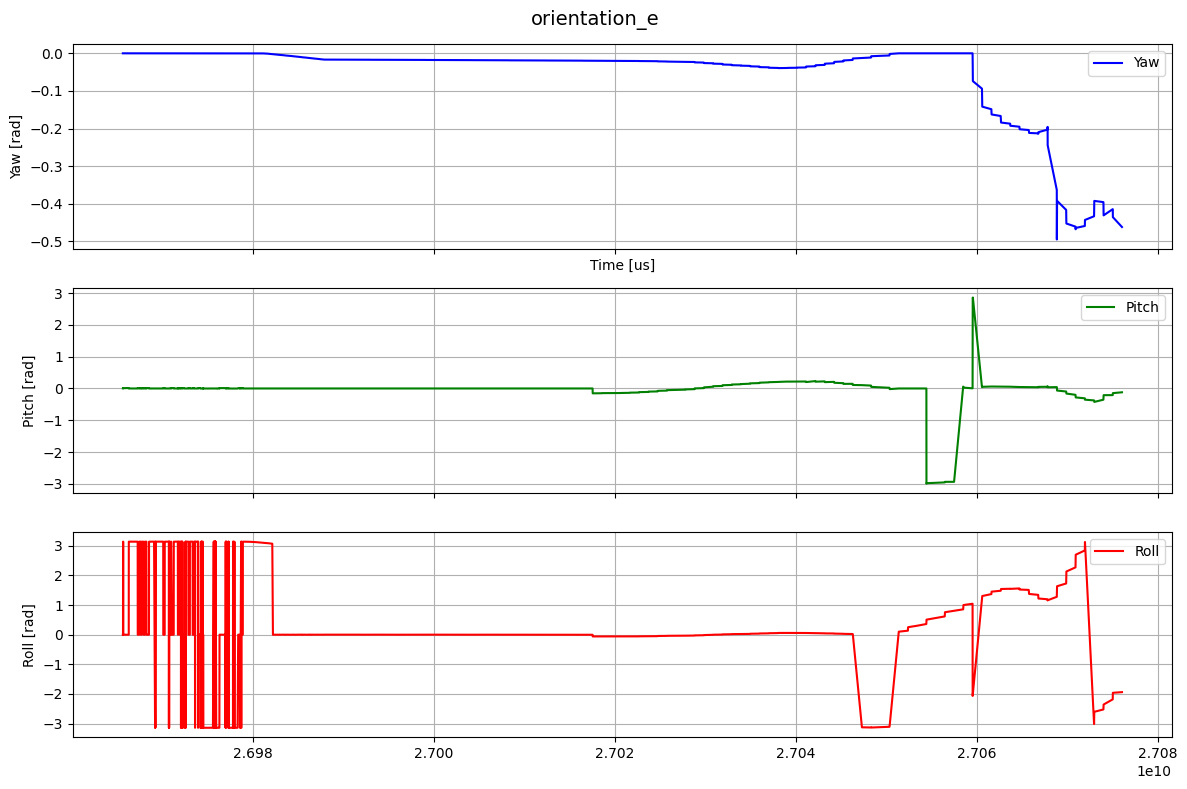

In [238]:
df5 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/pid_log.csv')
# df5 = df5[df5['timestamp_us'] > 2.5148e10]
# df5 = df5[df5['timestamp_us'] < 2.5171e10]
fig, (yaw_e, pitch_e, roll_e) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
roll_e.plot(df5['timestamp_us'], df5['roll_err'], label='Roll', color='r')
roll_e.set_ylabel("Roll [rad]")
roll_e.grid(True)
roll_e.legend()

# Pitch
pitch_e.plot(df5['timestamp_us'], df5['pitch_err'], label='Pitch', color='g')
pitch_e.set_ylabel("Pitch [rad]")
pitch_e.grid(True)
pitch_e.legend()

# Yaw
yaw_e.plot(df5['timestamp_us'], df5['yaw_err'], label='Yaw', color='b')
yaw_e.set_xlabel("Time [us]")
yaw_e.set_ylabel("Yaw [rad]")
yaw_e.grid(True)
yaw_e.legend()

# タイトルを全体に
fig.suptitle("orientation_e", fontsize=14)

plt.tight_layout()
plt.show()

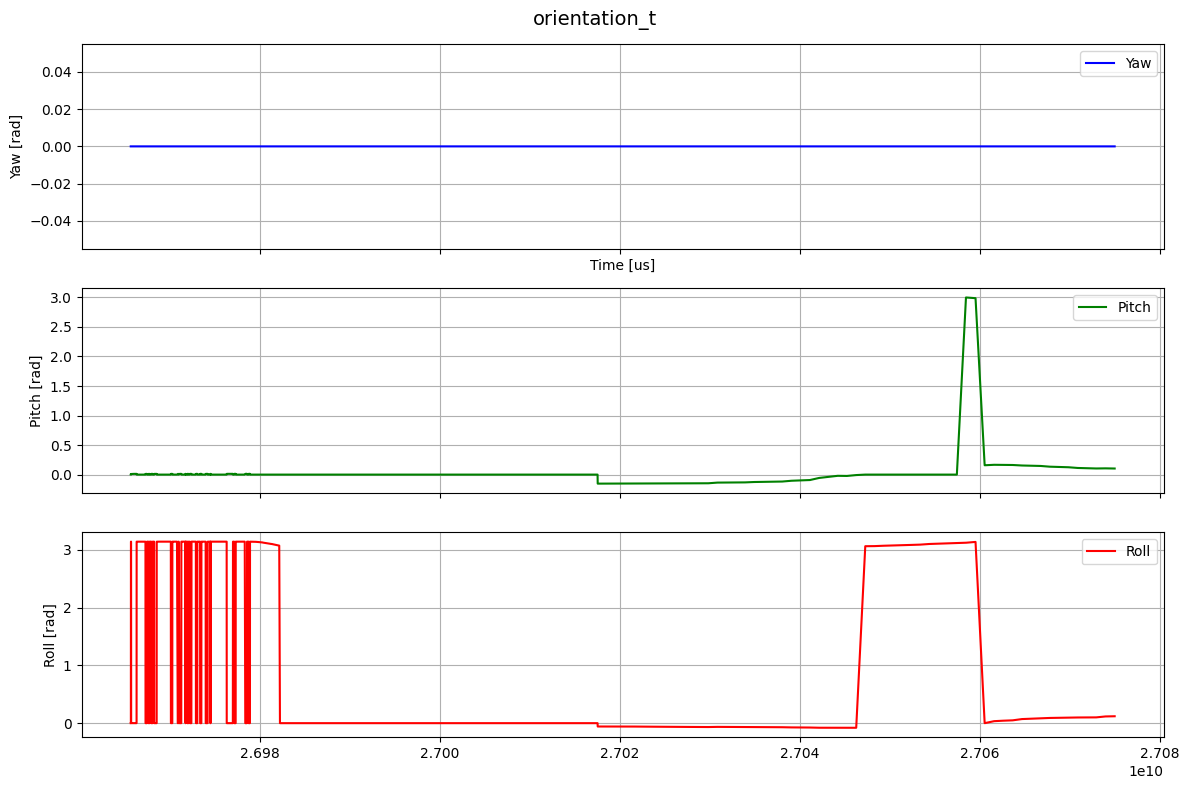

In [239]:
fig, (yaw_e, pitch_e, roll_e) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
roll_e.plot(df5['timestamp_us'], df5['target_roll'], label='Roll', color='r')
roll_e.set_ylabel("Roll [rad]")
roll_e.grid(True)
roll_e.legend()

# Pitch
pitch_e.plot(df5['timestamp_us'], df5['target_pitch'], label='Pitch', color='g')
pitch_e.set_ylabel("Pitch [rad]")
pitch_e.grid(True)
pitch_e.legend()

# Yaw
yaw_e.plot(df5['timestamp_us'], df5['target_yaw'], label='Yaw', color='b')
yaw_e.set_xlabel("Time [us]")
yaw_e.set_ylabel("Yaw [rad]")
yaw_e.grid(True)
yaw_e.legend()

# タイトルを全体に
fig.suptitle("orientation_t", fontsize=14)

plt.tight_layout()
plt.show()

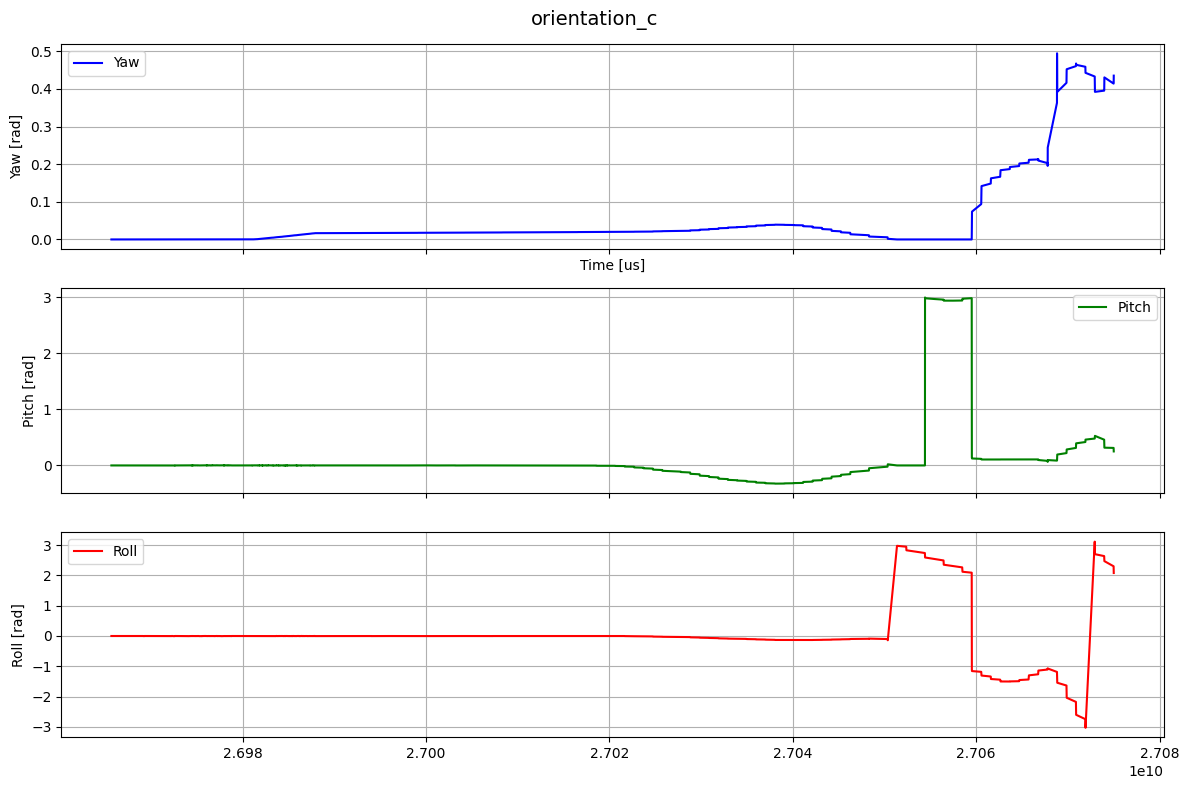

In [240]:
fig, (yaw_e, pitch_e, roll_e) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
roll_e.plot(df5['timestamp_us'], df5['curr_roll'], label='Roll', color='r')
roll_e.set_ylabel("Roll [rad]")
roll_e.grid(True)
roll_e.legend()

# Pitch
pitch_e.plot(df5['timestamp_us'], df5['curr_pitch'], label='Pitch', color='g')
pitch_e.set_ylabel("Pitch [rad]")
pitch_e.grid(True)
pitch_e.legend()

# Yaw
yaw_e.plot(df5['timestamp_us'], df5['curr_yaw'], label='Yaw', color='b')
yaw_e.set_xlabel("Time [us]")
yaw_e.set_ylabel("Yaw [rad]")
yaw_e.grid(True)
yaw_e.legend()

# タイトルを全体に
fig.suptitle("orientation_c", fontsize=14)

plt.tight_layout()
plt.show()

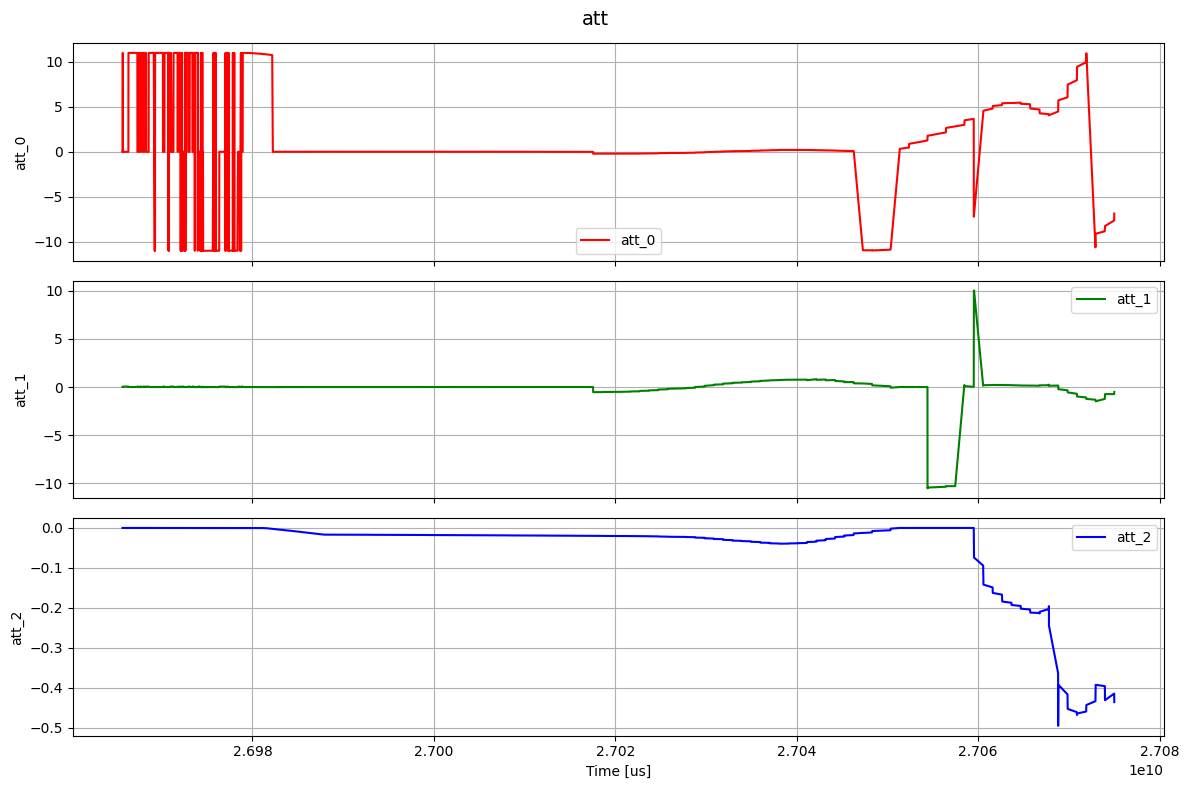

In [241]:
fig, (att_0, att_1, att_2) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
att_0.plot(df5['timestamp_us'], df5['att_0'], label='att_0', color='r')
att_0.set_ylabel("att_0")
att_0.grid(True)
att_0.legend()

# Pitch
att_1.plot(df5['timestamp_us'], df5['att_1'], label='att_1', color='g')
att_1.set_ylabel("att_1")
att_1.grid(True)
att_1.legend()

# Yaw
att_2.plot(df5['timestamp_us'], df5['att_2'], label='att_2', color='b')
att_2.set_xlabel("Time [us]")
att_2.set_ylabel("att_2")
att_2.grid(True)
att_2.legend()

# タイトルを全体に
fig.suptitle("att", fontsize=14)

plt.tight_layout()
plt.show()

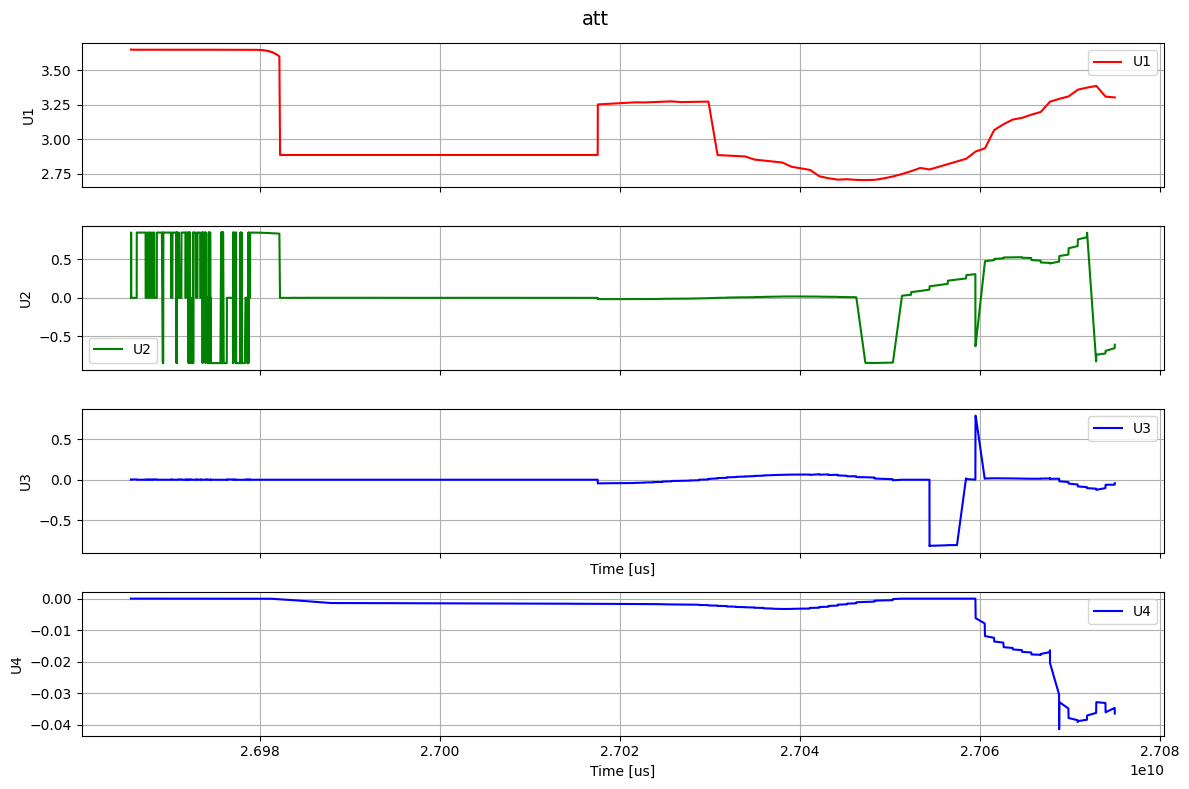

In [242]:
fig, (U1, U2, U3, U4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Roll
U1.plot(df5['timestamp_us'], df5['U1'], label='U1', color='r')
U1.set_ylabel("U1")
U1.grid(True)
U1.legend()

# Pitch
U2.plot(df5['timestamp_us'], df5['U2'], label='U2', color='g')
U2.set_ylabel("U2")
U2.grid(True)
U2.legend()

# Yaw
U3.plot(df5['timestamp_us'], df5['U3'], label='U3', color='b')
U3.set_xlabel("Time [us]")
U3.set_ylabel("U3")
U3.grid(True)
U3.legend()

U4.plot(df5['timestamp_us'], df5['U4'], label='U4', color='b')
U4.set_xlabel("Time [us]")
U4.set_ylabel("U4")
U4.grid(True)
U4.legend()

# タイトルを全体に
fig.suptitle("att", fontsize=14)

plt.tight_layout()
plt.show()

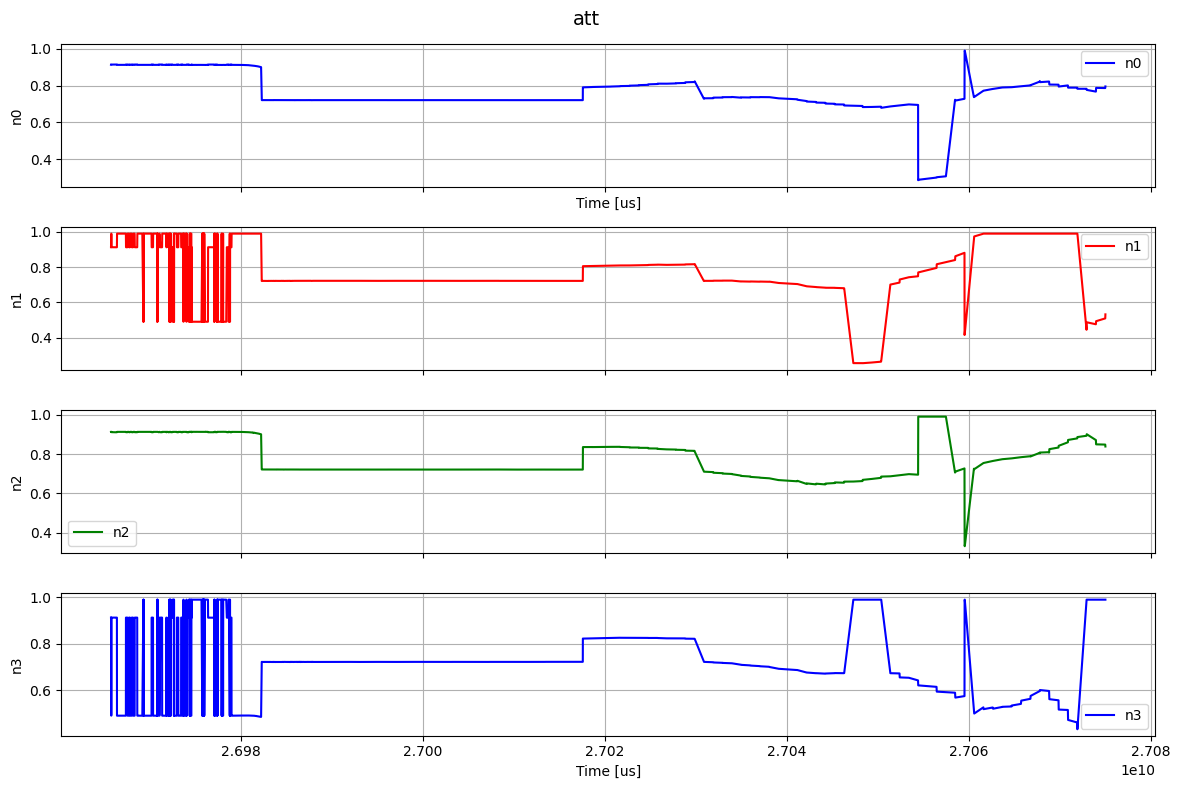

In [243]:
fig, (n0, n1, n2, n3) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Roll
n1.plot(df5['timestamp_us'], df5['n1'], label='n1', color='r')
n1.set_ylabel("n1")
n1.grid(True)
n1.legend()

# Pitch
n2.plot(df5['timestamp_us'], df5['n2'], label='n2', color='g')
n2.set_ylabel("n2")
n2.grid(True)
n2.legend()

# Yaw
n3.plot(df5['timestamp_us'], df5['n3'], label='n3', color='b')
n3.set_xlabel("Time [us]")
n3.set_ylabel("n3")
n3.grid(True)
n3.legend()

n0.plot(df5['timestamp_us'], df5['n0'], label='n0', color='b')
n0.set_xlabel("Time [us]")
n0.set_ylabel("n0")
n0.grid(True)
n0.legend()

# タイトルを全体に
fig.suptitle("att", fontsize=14)

plt.tight_layout()
plt.show()